In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


In [52]:
df = pd.read_excel('/Users/leolu/Desktop/uchicago/pjldc/data/project1.xlsx',sheet_name='Annual Planted',skiprows=1)
df = df[df['State'].isin(['CALIFORNIA','NEW MEXICO','TEXAS','ARIZONA'])]
list_of_states = set(df['State'])

In [53]:
df.columns

Index(['Year', 'Period', 'Geo Level', 'State', 'COTTON, PIMA - ACRES PLANTED',
       'COTTON, UPLAND - ACRES PLANTED', 'COTTON - ACRES PLANTED',
       'abandonment pct PIMA', 'abandonment pct UPLAND',
       'abandonment pct total', 'abandonment pct PIMA.1',
       'abandonment pct UPLAND.1', 'abandonment pct total.1',
       'COTTON, PIMA - ACRES HARVESTED', 'COTTON, UPLAND - ACRES HARVESTED',
       'COTTON - ACRES HARVESTED',
       'COTTON, PIMA - YIELD, MEASURED IN LB / ACRE',
       'COTTON, UPLAND - YIELD, MEASURED IN LB / ACRE',
       'COTTON - YIELD, MEASURED IN LB / ACRE',
       'COTTON, PIMA - PRODUCTION, MEASURED IN 480 LB BALES',
       'COTTON, UPLAND - PRODUCTION, MEASURED IN 480 LB BALES',
       'COTTON - PRODUCTION, MEASURED IN 480 LB BALES'],
      dtype='object')

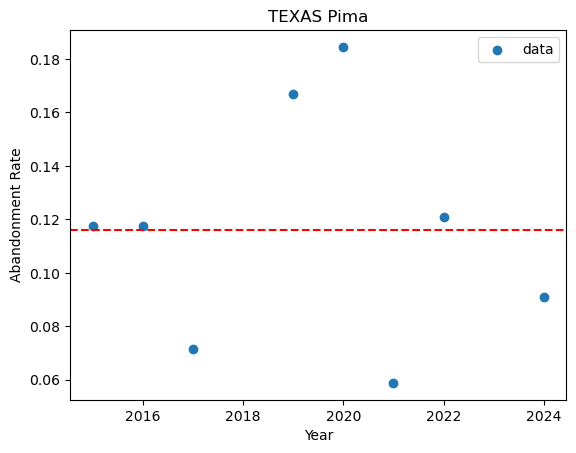

  → Prediction for 2025 Pima: 0.11605608780531382



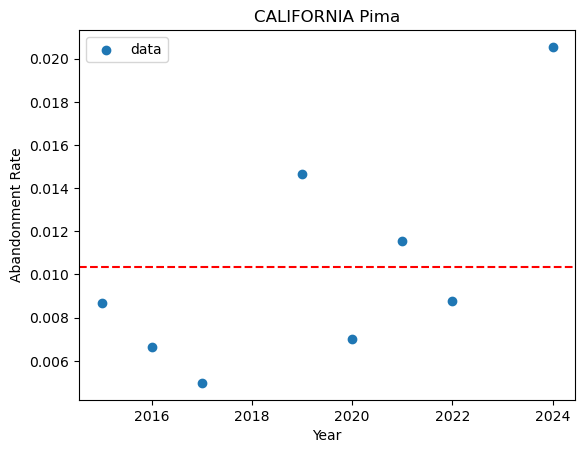

  → Prediction for 2025 Pima: 0.010360002522291398



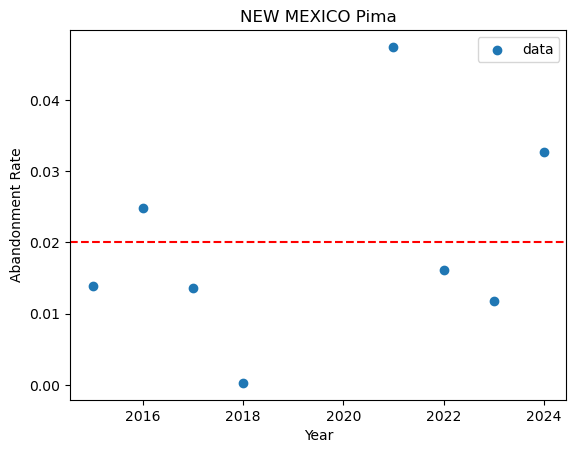

  → Prediction for 2025 Pima: 0.020103718626432093



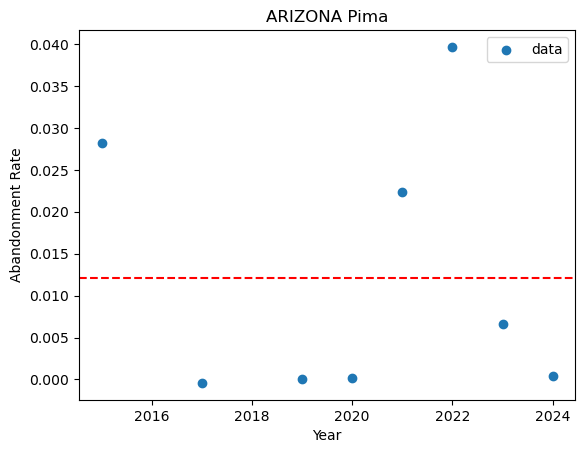

  → Prediction for 2025 Pima: 0.012134861921430082



In [54]:
listofabdrate = []
for state in list_of_states:
    state_df = df[df['State'] == state].sort_values(by=['Year'],ascending=True)
    y = state_df['abandonment pct PIMA']
    x = state_df['Year']
    
    lower, upper = y.quantile([0.05, 0.95])
    mask      = y.between(lower, upper)
    y      =  y[mask]
    x = x[mask]
    y = y.values
    #plt.scatter(x, y)
    #plt.title(states)
    #plt.show()
    # Fit a linear model (degree=1)


    # Compute R²
    y_pred = y.mean()


    # Plot
    plt.figure()
    plt.scatter(x, y, label='data')
    plt.title(f"{state} Pima")
    plt.xlabel("Year")
    plt.ylabel("Abandonment Rate")
    plt.legend()
    plt.axhline(y_pred, color='r',linestyle='--')
    plt.show()

    # 2025 prediction
    pred_2025 = y_pred
    print(f"  → Prediction for 2025 Pima: {pred_2025}\n")
    listofabdrate.append({state:pred_2025})

TEXAS  →  R² = 0.5550,   coeffs = [-3.51090909e+01  7.17263091e+04]


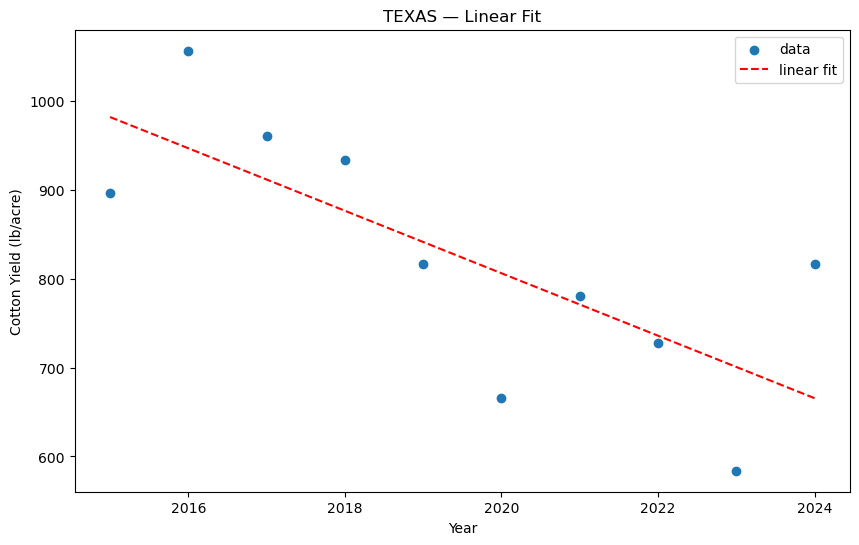

  → Prediction for 2025 pima: 630.4

CALIFORNIA  →  R² = 0.2743,   coeffs = [-2.15575758e+01  4.50232242e+04]


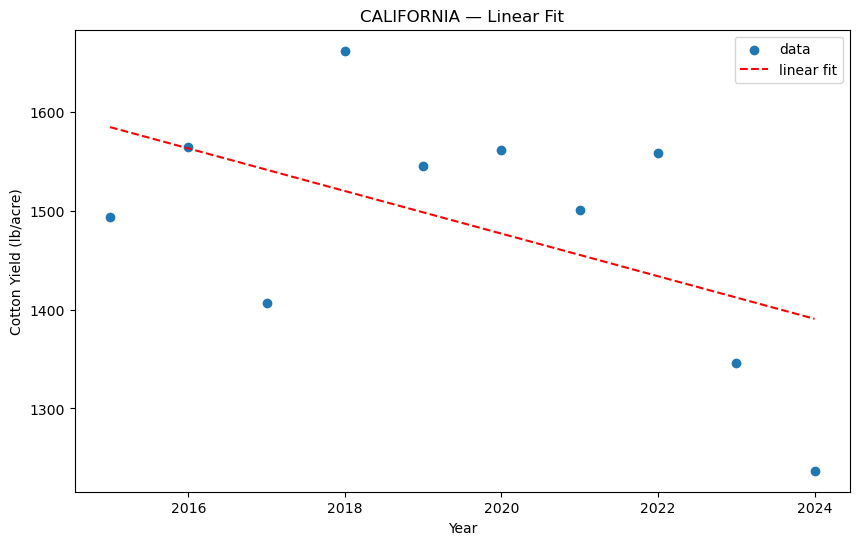

  → Prediction for 2025 pima: 1369.1

NEW MEXICO  →  R² = 0.3556,   coeffs = [-1.83757576e+01  3.79066424e+04]


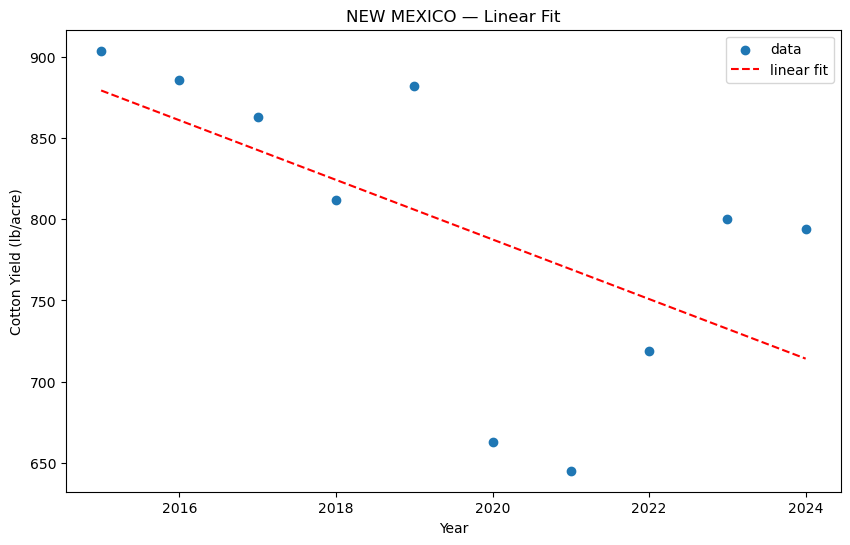

  → Prediction for 2025 pima: 695.7

ARIZONA  →  R² = 0.2253,   coeffs = [ 1.18606061e+01 -2.30205939e+04]


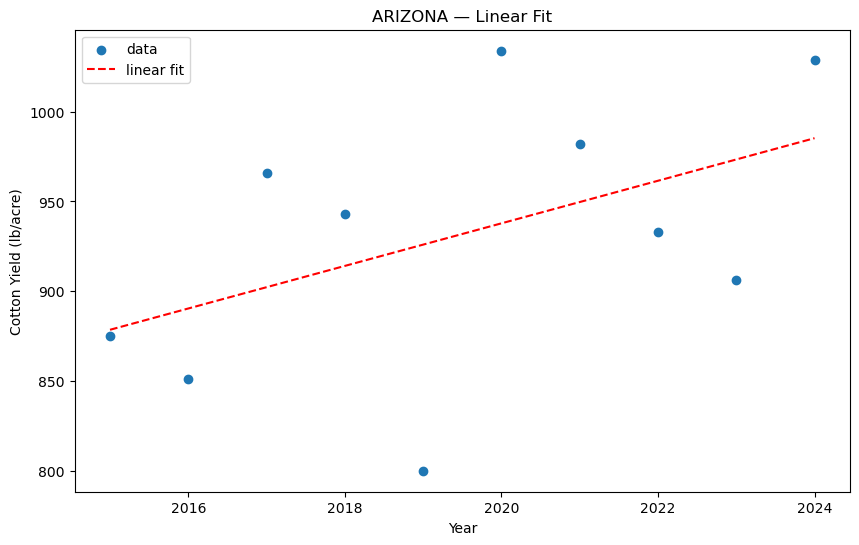

  → Prediction for 2025 pima: 997.1



In [55]:
import numpy as np
import matplotlib.pyplot as plt
listofyields = []
for state in list_of_states:
    state_df = df[df['State'] == state].sort_values('Year')
    # Use a numpy array for x
    x = np.arange(2015, 2025)                  # [2015, …, 2024]
    y = state_df['COTTON, PIMA - YIELD, MEASURED IN LB / ACRE'].values[:-1]

    # Fit a linear model (degree=1)
    coeffs = np.polyfit(x, y, 1)
    model  = np.poly1d(coeffs)

    # Compute R²
    y_pred = model(x)
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2     = 1 - ss_res/ss_tot
    print(f"{state}  →  R² = {r2:.4f},   coeffs = {coeffs}")

    # Build a smooth curve for plotting
    x_line = np.linspace(x.min(), x.max(), 200)
    y_line = model(x_line)

    # Plot
    plt.figure(figsize = (10,6))
    plt.scatter(x, y, label='data')
    plt.plot(x_line, y_line, label='linear fit', color = 'r', linestyle = '--')
    plt.title(f"{state} — Linear Fit")
    plt.xlabel("Year")
    plt.ylabel("Cotton Yield (lb/acre)")
    plt.legend()
    plt.show()

    # 2025 prediction
    pred_2025 = model(2025)
    print(f"  → Prediction for 2025 pima: {pred_2025:.1f}\n")
    listofyields.append({state:pred_2025})

In [56]:
futures_prices = pd.read_excel('/Users/leolu/Desktop/uchicago/pjldc/data/project1.xlsx', sheet_name='FUTURES CLEAN', skiprows=1)
futures_prices.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
# ensure Date is datetime
futures_prices['Date'] = pd.to_datetime(futures_prices['Date'])
# extract year (no ())
futures_prices['Year'] = futures_prices['Date'].dt.year
futures_prices = futures_prices.groupby('Year').mean().reset_index()
futures_prices['ratio sum'] = futures_prices['SOY TO COTTON']+futures_prices['CORN TO COTTON']
futures_prices_2025_ratio = futures_prices.iloc[10]['ratio sum']
futures_prices_train = futures_prices[:-1]
x_train = futures_prices_train[['ratio sum']]
futures_prices = futures_prices[1:]
futures_prices = futures_prices[:-1]
x_train = futures_prices[['ratio sum']]
x_train

,ratio sum
1,22.977102
2,18.425310
3,17.380968
4,18.424300
5,20.923942
6,22.092657
7,19.009927
8,22.421900
9,21.149546


TEXAS R²: 0.0732
TEXAS coeffs: [ 1292.35743898 -2805.58266606]


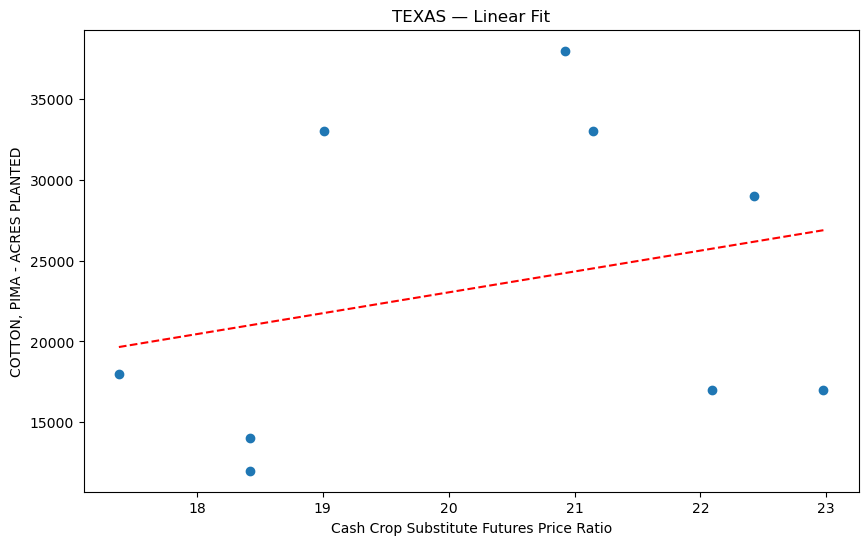

prediction: 24991.79970051253
predictionoosrate: 16    2008.200299
Name: COTTON, PIMA - ACRES PLANTED, dtype: float64
CALIFORNIA R²: 0.5334
CALIFORNIA coeffs: [-18064.04417858 518689.93002828]


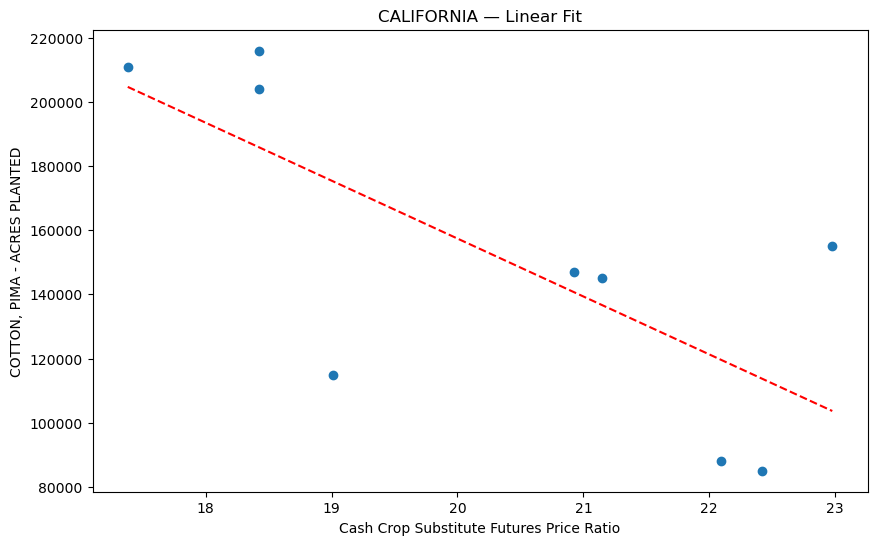

prediction: 130149.47831317352
predictionoosrate: 4   -30149.478313
Name: COTTON, PIMA - ACRES PLANTED, dtype: float64
NEW MEXICO R²: 0.1407
NEW MEXICO coeffs: [  898.08278451 -6963.84542162]


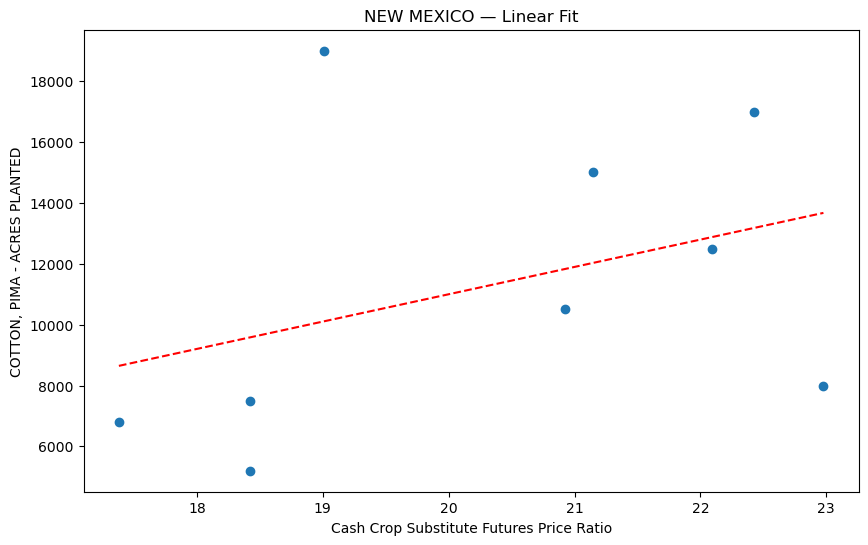

prediction: 12353.063201978628
predictionoosrate: 11   -6353.063202
Name: COTTON, PIMA - ACRES PLANTED, dtype: float64
ARIZONA R²: 0.0000
ARIZONA coeffs: [-9.88788556e+00  1.26452846e+04]


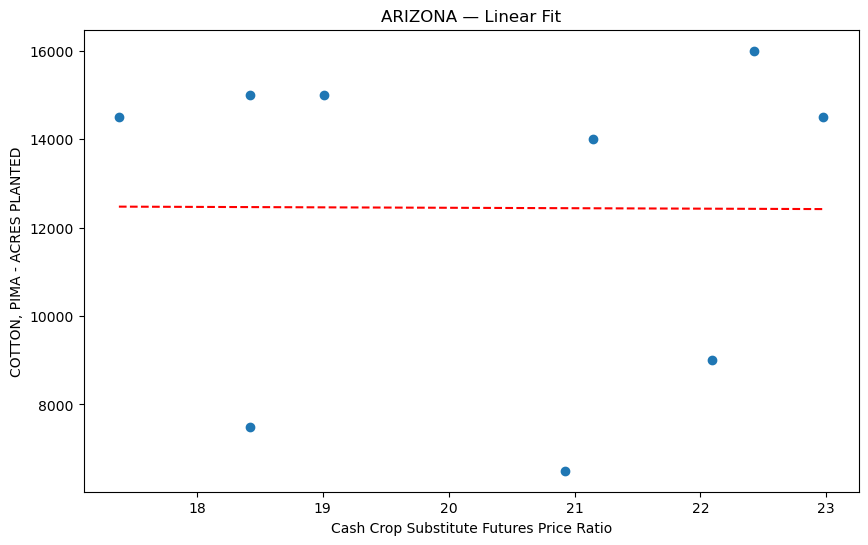

prediction: 12432.605558984696
predictionoosrate: 2    11567.394441
Name: COTTON, PIMA - ACRES PLANTED, dtype: float64


In [57]:
listofplanted = []
for state in list_of_states:
    # Prepare x and y
    
    x = np.asarray(x_train).ravel()
    state_df = df[df['State'] == state].copy()
    state_df = state_df[state_df['Year'] != 2025]
    state_df = state_df[state_df['Year'] != 2015]
    state_df.sort_values('Year', inplace=True)
    y = state_df['COTTON, PIMA - ACRES PLANTED'].values

    # Fit cubic
    coeffs = np.polyfit(x, y, 1)
    model  = np.poly1d(coeffs)

    # Compute R²
    y_pred = model(x)
    ss_res = np.sum((y - y_pred)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2     = 1 - ss_res/ss_tot
    print(f"{state} R²: {r2:.4f}")
    print(f"{state} coeffs: {coeffs}")

    # Build a smooth x-axis for plotting the fitted curve
    x_line = np.linspace(x.min(), x.max(), 200)
    y_line = model(x_line)

    # Plot
    plt.figure(figsize = (10,6))               # new figure per state
    plt.scatter(x, y)          # actual data
    plt.plot(x_line, y_line, color = 'r', linestyle = '--')   # fitted cubic curve
    plt.title(f"{state} — Linear Fit")
    plt.xlabel("Cash Crop Substitute Futures Price Ratio")
    plt.ylabel("COTTON, PIMA - ACRES PLANTED")
    plt.show()
    
    state2025 = df[df['State'] == state].copy()
    state2025 = state2025[state2025['Year']==2025]
    prediction = coeffs[0]*futures_prices_2025_ratio + coeffs[1]
    predictionoosdiff = state2025['COTTON, PIMA - ACRES PLANTED']-prediction
    print(f'prediction: {prediction}')
    print(f'predictionoosrate: {predictionoosdiff}')
    
    listofplanted.append({state:prediction})

In [58]:
print(listofplanted)
print('-------------')
print(listofabdrate)
print('-------------')
print(listofyields)

[{'TEXAS': 24991.79970051253}, {'CALIFORNIA': 130149.47831317352}, {'NEW MEXICO': 12353.063201978628}, {'ARIZONA': 12432.605558984696}]
-------------
[{'TEXAS': 0.11605608780531382}, {'CALIFORNIA': 0.010360002522291398}, {'NEW MEXICO': 0.020103718626432093}, {'ARIZONA': 0.012134861921430082}]
-------------
[{'TEXAS': 630.3999999999796}, {'CALIFORNIA': 1369.1333333333241}, {'NEW MEXICO': 695.7333333333154}, {'ARIZONA': 997.1333333333387}]


In [59]:
listofproduction = []

for planted_dict in listofplanted:
    # unpack the one (state, planted) pair
    state, planted = next(iter(planted_dict.items()))
    
    # find the matching abandonment‐rate and yield
    abdrate = next(d[state] for d in listofabdrate  if state in d)
    yld     = next(d[state] for d in listofyields if state in d)
    
    # compute
    production = planted * (1 - abdrate) * yld / 480
    listofproduction.append({state: production})

print(listofproduction)


[{'TEXAS': 29013.305282740628}, {'CALIFORNIA': 367387.3325380092}, {'NEW MEXICO': 17545.120163196585}, {'ARIZONA': 25513.60408207409}]


In [63]:
import pandas as pd
from pathlib import Path
from functools import reduce   # only if you prefer merge-reduce

root = Path('/Users/leolu/Desktop/uchicago/pjldc/data/precip')

frames = []

for state in list_of_states:
    if state == 'US TOTAL':       # skip the aggregate row
        continue

    # build the file name, e.g. 'alabama.csv'
    file = root / f'{state.lower().replace(" ", " ")}.csv'

    df = (
        pd.read_csv(file, skiprows=3, parse_dates=['Date'])    # NOAA CAG layout
          .loc[:, ['Date', 'Value']]                           # keep only what you need
          .rename(columns={'Value': state})                    # give the column the state name
    )
    frames.append(df)

# ──►  Option 1: concat (simplest)  ───────────────────────────
combined = (
    pd.concat([f.set_index('Date') for f in frames], axis=1)   # join on the index
      .reset_index()                                           # back to a normal column if you like
)

# ──►  Option 2: iterative merge (outer join) ─────────────────
# combined = reduce(lambda l, r: l.merge(r, on='Date', how='outer'), frames)

print(combined.tail())


      Date  TEXAS  CALIFORNIA  NEW MEXICO  ARIZONA
6   202105   9.64        2.13        2.00     0.96
7   202205   4.84        3.07        0.73     0.60
8   202305   8.29        8.92        2.31     2.57
9   202405   9.59        6.20        1.67     2.22
10  202505   8.57        4.97        2.17     1.78


/var/folders/b1/lfl3rf212fq4g372d7yytyyc0000gn/T/ipykernel_39951/820235605.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.read_csv(file, skiprows=3, parse_dates=['Date'])    # NOAA CAG layout
/var/folders/b1/lfl3rf212fq4g372d7yytyyc0000gn/T/ipykernel_39951/820235605.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.read_csv(file, skiprows=3, parse_dates=['Date'])    # NOAA CAG layout
/var/folders/b1/lfl3rf212fq4g372d7yytyyc0000gn/T/ipykernel_39951/820235605.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.read_csv(file, skiprows=3, parse_dates=['Date']

In [64]:
futures_prices_train = futures_prices_train[['Year','ratio sum']]
futures_prices_train

,Year,ratio sum
0,2015,20.629952
1,2016,22.977102
2,2017,18.425310
3,2018,17.380968
4,2019,18.424300
5,2020,20.923942
6,2021,22.092657
7,2022,19.009927
8,2023,22.421900
9,2024,21.149546


In [65]:
df = pd.read_excel('/Users/leolu/Desktop/uchicago/pjldc/data/project1.xlsx',sheet_name='Annual Planted',skiprows=1)
df = df[df['State'].isin(['CALIFORNIA','NEW MEXICO','TEXAS','ARIZONA'])]
list_of_states = set(df['State'])

In [66]:
import pandas as pd

# df_left  and df_right already exist
# If you truly don't care about matching / sorting the index:
result = pd.concat(
    [futures_prices_train.reset_index(drop=True),
     combined.reset_index(drop=True)],
    axis=1
)

# remove the 'Date' column in place
regressors = result.drop(columns='Date')      # or result = result.drop('Date', axis=1)


TEXAS: R² = 0.307
    price coeff   = 2583.194
    precip coeff  = -1570.410
    intercept     = -15350.7


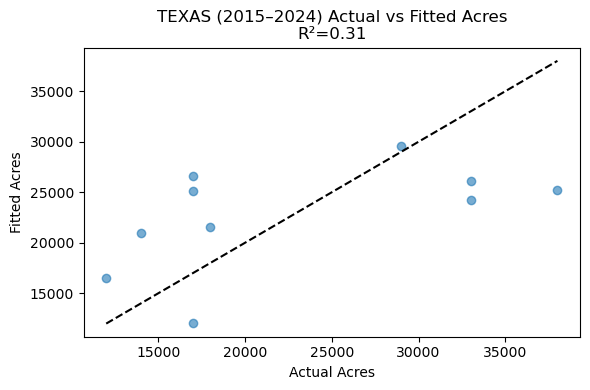

CALIFORNIA: R² = 0.670
    price coeff   = -17689.067
    precip coeff  = 7939.858
    intercept     = 462139.2


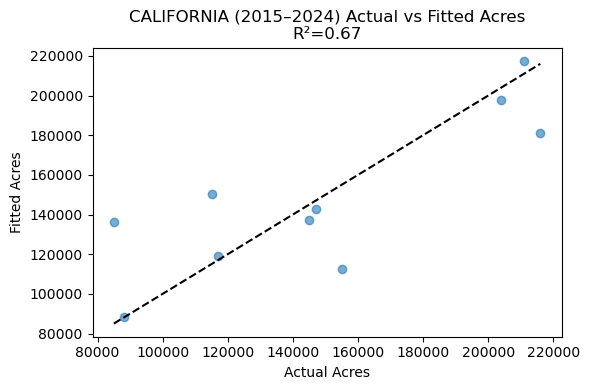

NEW MEXICO: R² = 0.422
    price coeff   = 1184.858
    precip coeff  = -2884.758
    intercept     = -7403.9


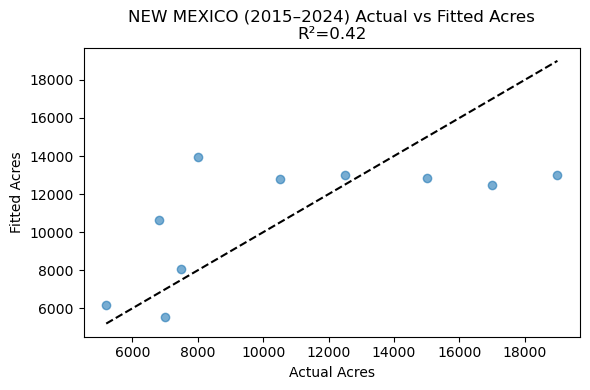

ARIZONA: R² = 0.069
    price coeff   = 241.865
    precip coeff  = -1218.939
    intercept     = 10131.0


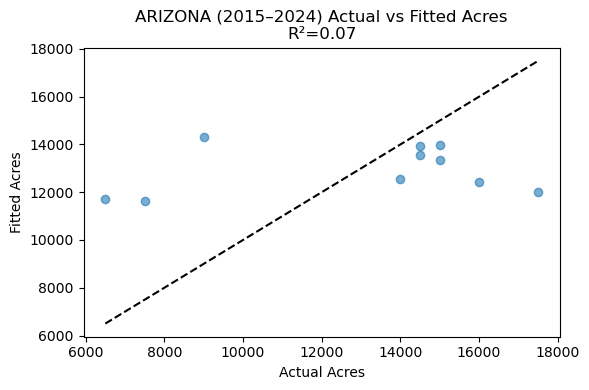

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

for state in list_of_states:
    if state == 'US TOTAL': continue
    # 1) select only 2015–2024 for this state
    mask = (df['State'] == state) & (df['Year'] >= 2015) & (df['Year'] <= 2024)
    sample = df.loc[mask].sort_values('Year')
    years  = sample['Year'].values

    # 2) get regressors for those years
    x_price  = regressors.loc[regressors['Year'].isin(years), 'ratio sum'].values
    x_precip = regressors.loc[regressors['Year'].isin(years), state].values

    # 3) response variable
    y = sample['COTTON, PIMA - ACRES PLANTED'].values

    # 4) build design matrix [price, precip, intercept]
    X = np.column_stack([x_price, x_precip, np.ones_like(x_price)])

    # 5) fit by least squares
    beta_price, beta_precip, intercept = np.linalg.lstsq(X, y, rcond=None)[0]

    # 6) compute in-sample R²
    y_pred = X.dot([beta_price, beta_precip, intercept])
    ss_res = ((y - y_pred) ** 2).sum()
    ss_tot = ((y - y.mean()) ** 2).sum()
    r2     = 1 - ss_res / ss_tot

    # 7) report results
    print(f"{state}: R² = {r2:.3f}")
    print(f"    price coeff   = {beta_price:.3f}")
    print(f"    precip coeff  = {beta_precip:.3f}")
    print(f"    intercept     = {intercept:.1f}")

    # Optional: plot actual vs. fitted
    plt.figure(figsize=(6,4))
    plt.scatter(y, y_pred, alpha=0.6)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
    plt.title(f"{state} (2015–2024) Actual vs Fitted Acres\nR²={r2:.2f}")
    plt.xlabel("Actual Acres")
    plt.ylabel("Fitted Acres")
    plt.tight_layout()
    plt.show()


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

futures_price_2025_ratio = 21.50905123315864


row25 = combined.iloc[-1]  

predictions = []

for state in list_of_states:
    if state == 'US TOTAL':
        continue

    # 1) fit on 2015–2024
    mask = (df['State'] == state) & (df['Year'].between(2015, 2024))
    sample = df.loc[mask].sort_values('Year')
    years  = sample['Year'].values

    x_price  = regressors.loc[regressors['Year'].isin(years), 'ratio sum'].values
    x_precip = regressors.loc[regressors['Year'].isin(years), state].values
    y        = sample['COTTON, PIMA - ACRES PLANTED'].values

    X = np.column_stack([x_price, x_precip, np.ones_like(x_price)])
    beta_price, beta_precip, intercept = np.linalg.lstsq(X, y, rcond=None)[0]

    # 2) predict 2025 using the last row of combined
    precip_2025 = row25[state]
    pred_2025   = beta_price * futures_price_2025_ratio + beta_precip * precip_2025 + intercept

    predictions.append({'State': state, 'Predicted_Acres_2025': pred_2025})
    print(f"{state:15s} → {pred_2025:,.0f} acres")


df_preds = pd.DataFrame(predictions)
print("\nAll state predictions for 2025:\n", df_preds)

df_preds.to_csv('predicted_acres_pima_2025.csv', index=False)


TEXAS           → 26,753 acres
CALIFORNIA      → 121,125 acres
NEW MEXICO      → 11,821 acres
ARIZONA         → 13,164 acres

All state predictions for 2025:
         State  Predicted_Acres_2025
0       TEXAS          26752.934829
1  CALIFORNIA         121125.231722
2  NEW MEXICO          11821.305667
3     ARIZONA          13163.631284
